In [2]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.utils as cosmoutils
import cosmoplot.style as cosmostyle

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle
cc = cosmostyle.color_cycle

# Learning Curves

Matrix Format: data = [pca, width, sigma, no. training points, x]

x = 0: pca  
x = 1: width  
x = 2: sigma  
x = 3: jitter  
x = 4: no. training points  
x = 5: error (MAE/RMSE)  
x = 6: standard deviation of error  

For example, data[-1, -1, -1, -1, :, 5] contains the error values for all the training points
at the final pca, width, and sigma designations. The corresponding training point values are 
stored in data[-1, -1, -1, -1, :, 4]

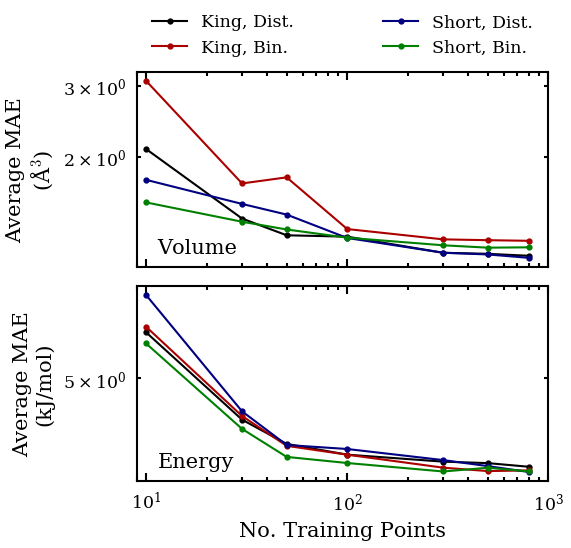

In [39]:
# Load DEEM 1k Rings

#TODO: Update with jitter parameter

volKD = np.load('../Processed_Data/DEEM_1k/Volume/Rings/King/Distribution/maeAvgTest.npy') #
volKB = np.load('../Processed_Data/DEEM_1k/Volume/Rings/King/Binary/maeAvgTest.npy') #
volSD = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/maeAvgTest.npy') #
volSB = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Binary/maeAvgTest.npy') #
eKD = np.load('../Processed_Data/DEEM_1k/Energy/Rings/King/Distribution/maeAvgTest.npy') #
eKB = np.load('../Processed_Data/DEEM_1k/Energy/Rings/King/Binary/maeAvgTest.npy') #
eSD = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/maeAvgTest.npy') #
eSB = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Binary/maeAvgTest.npy') #

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(volKD[0, 0, 0, :, 3], volKD[0, 0, 0, :, 4], marker='o', label='King, Dist.')
axsVolume.loglog(volKB[0, 0, 0, :, 3], volKB[0, 0, 0, :, 4], marker='o', label='King, Bin.')
axsVolume.loglog(volSD[0, 0, 0, :, 3], volSD[0, 0, 0, :, 4], marker='o', label='Short, Dist.')
axsVolume.loglog(volSB[0, 0, 0, :, 3], volSB[0, 0, 0, :, 4], marker='o', label='Short, Bin.')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(eKD[0, 0, 0, :, 3], eKD[0, 0, 0, :, 4], marker='o', label='King, Distribution')
axsEnergy.loglog(eKB[0, 0, 0, :, 3], eKB[0, 0, 0, :, 4], marker='o', label='King, Binary')
axsEnergy.loglog(eSD[0, 0, 0, :, 3], eSD[0, 0, 0, :, 4], marker='o', label='Short, Distribution')
axsEnergy.loglog(eSB[0, 0, 0, :, 3], eSB[0, 0, 0, :, 4], marker='o', label='Short, Binary')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(volKD[0, 0, 0, :, 3], volKD[0, 0, 0, :, 4], yerr=volKD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volKB[0, 0, 0, :, 3], volKB[0, 0, 0, :, 4], yerr=volKB[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volSD[0, 0, 0, :, 3], volSD[0, 0, 0, :, 4], yerr=volSD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volSB[0, 0, 0, :, 3], volSB[0, 0, 0, :, 4], yerr=volSB[0, 0, 0, :, 5], fmt='none')

#axsEnergy.errorbar(eKD[0, 0, 0, :, 3], eKD[0, 0, 0, :, 4], yerr=eKD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eKB[0, 0, 0, :, 3], eKB[0, 0, 0, :, 4], yerr=eKB[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eSD[0, 0, 0, :, 3], eSD[0, 0, 0, :, 4], yerr=eSD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eSB[0, 0, 0, :, 3], eSB[0, 0, 0, :, 4], yerr=eSB[0, 0, 0, :, 5], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.5), ncol=2, mode='expand')
axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_1k/learn_rings.pdf', bbox_inches='tight')
plt.show()

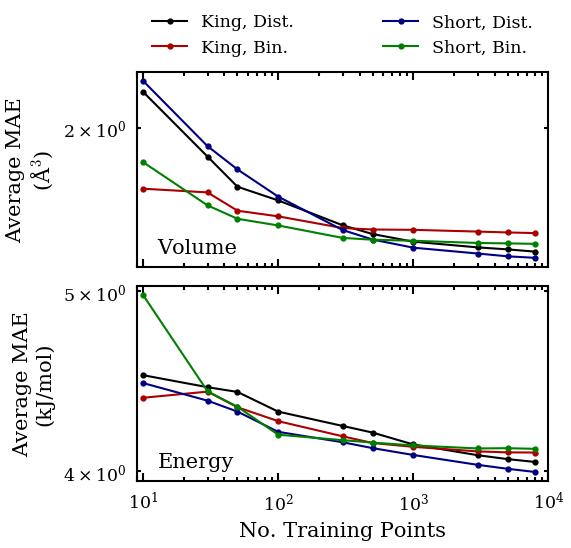

In [40]:
# Load DEEM 10k rings

#TODO: Update with jitter parameter

volKD = np.load('../Processed_Data/DEEM_10k/Volume/Rings/King/Distribution/maeAvgTest.npy') #
volKB = np.load('../Processed_Data/DEEM_10k/Volume/Rings/King/Binary/maeAvgTest.npy') #
volSD = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/maeAvgTest.npy') #
volSB = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Binary/maeAvgTest.npy') #
eKD = np.load('../Processed_Data/DEEM_10k/Energy/Rings/King/Distribution/maeAvgTest.npy') #
eKB = np.load('../Processed_Data/DEEM_10k/Energy/Rings/King/Binary/maeAvgTest.npy') #
eSD = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/maeAvgTest.npy') #
eSB = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Binary/maeAvgTest.npy') #

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, 0, :, 5], marker='o', label='King, Dist.')
axsVolume.loglog(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, 0, :, 5], marker='o', label='King, Bin.')
axsVolume.loglog(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Dist.')
axsVolume.loglog(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Bin.')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], marker='o', label='King, Distribution')
axsEnergy.loglog(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], marker='o', label='King, Binary')
axsEnergy.loglog(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], marker='o', label='Short, Distribution')
axsEnergy.loglog(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], marker='o', label='Short, Binary')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(volKD[0, 0, 0, 0, :, 4], volKD[0, 0, 0, :, 5], yerr=volKD[0, 0, 0, :, 6], fmt='none')
#axsVolume.errorbar(volKB[0, 0, 0, 0, :, 4], volKB[0, 0, 0, :, 5], yerr=volKB[0, 0, 0, :, 6], fmt='none')
#axsVolume.errorbar(volSD[0, 0, 0, 0, :, 4], volSD[0, 0, 0, :, 5], yerr=volSD[0, 0, 0, :, 6], fmt='none')
#axsVolume.errorbar(volSB[0, 0, 0, 0, :, 4], volSB[0, 0, 0, :, 5], yerr=volSB[0, 0, 0, :, 6], fmt='none')

#axsEnergy.errorbar(eKD[0, 0, 0, 0, :, 4], eKD[0, 0, 0, 0, :, 5], yerr=eKD[0, 0, 0, 0, :, 6], fmt='none')
#axsEnergy.errorbar(eKB[0, 0, 0, 0, :, 4], eKB[0, 0, 0, 0, :, 5], yerr=eKB[0, 0, 0, 0, :, 6], fmt='none')
#axsEnergy.errorbar(eSD[0, 0, 0, 0, :, 4], eSD[0, 0, 0, 0, :, 5], yerr=eSD[0, 0, 0, 0, :, 6], fmt='none')
#axsEnergy.errorbar(eSB[0, 0, 0, 0, :, 4], eSB[0, 0, 0, 0, :, 5], yerr=eSB[0, 0, 0, 0, :, 6], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.5), ncol=2, mode='expand')
axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_10k/learn_rings.pdf', bbox_inches='tight')
plt.show()

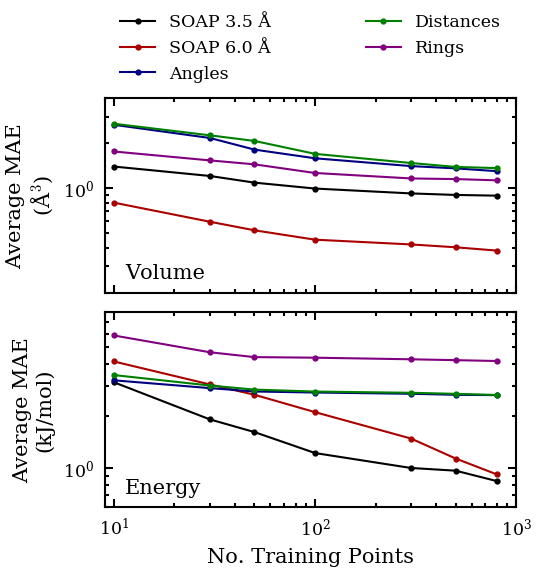

In [41]:
# Load DEEM 1k learning curves

#TODO: Update with jitter parameter

vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_1k/Volume/Distances/maeAvgTest.npy')
volA = np.load('../Processed_Data/DEEM_1k/Volume/Angles/maeAvgTest.npy')
volR = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/maeAvgTest.npy')
eD = np.load('../Processed_Data/DEEM_1k/Energy/Distances/maeAvgTest.npy')
eA = np.load('../Processed_Data/DEEM_1k/Energy/Angles/maeAvgTest.npy')
eR = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], marker='o', label=u'SOAP 3.5 \u00c5')
axsVolume.loglog(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], marker='o', label=u'SOAP 6.0 \u00c5')
axsVolume.loglog(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], marker='o', label='Distances')
axsVolume.loglog(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], marker='o', label='Rings')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], marker='o', label=u'SOAP 3.5 \u00c5')
axsEnergy.loglog(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], marker='o', label=u'SOAP 6.0 \u00c5')
axsEnergy.loglog(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], marker='o', label='Distances')
axsEnergy.loglog(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], marker='o', label='Rings')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], yerr=volA[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], yerr=volD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], yerr=volR[0, 0, 0, :, 5], fmt='none')

#axsEnergy.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], yerr=eA[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], yerr=eD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], yerr=eR[0, 0, 0, :, 5], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
axsVolume.set_ylim([0.2, 4])
axsEnergy.set_ylim([0.6, 8])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)


figLearn.savefig('../Results/DEEM_1k/learn.pdf', bbox_inches='tight')
plt.show()

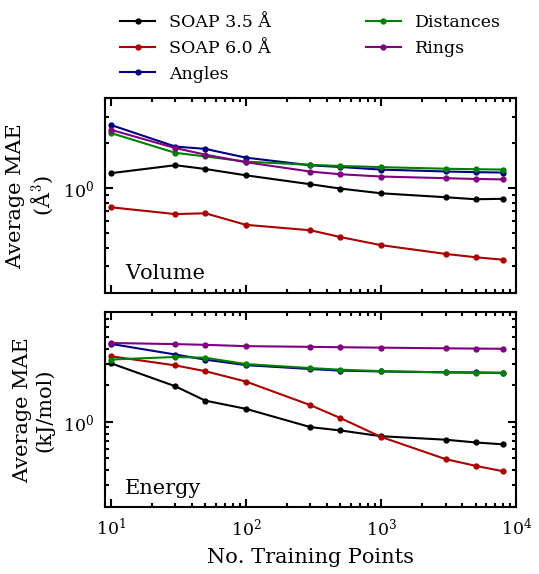

In [42]:
# Load DEEM 10k learning curves

#TODO: Update with jitter parameter

vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_10k/Volume/Distances/maeAvgTest.npy') 
volA = np.load('../Processed_Data/DEEM_10k/Volume/Angles/maeAvgTest.npy') 
volR = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/maeAvgTest.npy') 
eD = np.load('../Processed_Data/DEEM_10k/Energy/Distances/maeAvgTest.npy') 
eA = np.load('../Processed_Data/DEEM_10k/Energy/Angles/maeAvgTest.npy') 
eR = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/maeAvgTest.npy') 


figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], marker='o', label=u'SOAP 3.5 \u00c5')
axsVolume.loglog(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], marker='o', label=u'SOAP 6.0 \u00c5')
axsVolume.loglog(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], marker='o', label='Angles')
axsVolume.loglog(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], marker='o', label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], marker='o', label=u'SOAP 3.5 \u00c5')
axsEnergy.loglog(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], marker='o', label=u'SOAP 6.0 \u00c5')
axsEnergy.loglog(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], marker='o', label='Angles')
axsEnergy.loglog(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], marker='o', label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', label='Rings')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], yerr=volA[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], yerr=volD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], yerr=volR[0, 0, 0, :, 5], fmt='none')

#axsEnergy.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], yerr=eA[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], yerr=eD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], yerr=eR[0, 0, 0, :, 5], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
axsVolume.set_ylim([0.2, 4])
axsEnergy.set_ylim([0.2, 8])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_10k/learn.pdf', bbox_inches='tight')
plt.show()

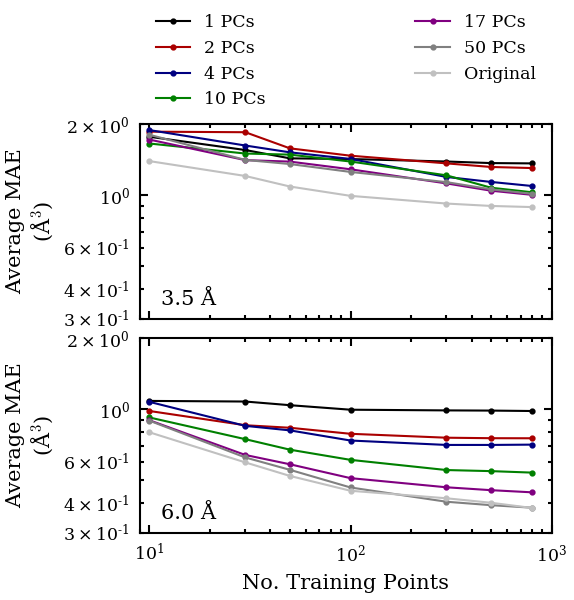

In [43]:
# Load DEEM 1k learning curves: PCA reconstructed volume

#TODO: Update with jitter parameter

vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/KPCALearn/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/KPCALearn/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axs6.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
#axs3.set_prop_cycle(None)
#axs6.set_prop_cycle(None)
#for i in np.arange(0, PCALearn3.shape[0]):    
#    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
#                 yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
#    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5],
#                 yerr=PCALearn6[i, 0, 0, 0, :, 6])

axs3.loglog(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5],
#             fmt='none', ecolor=colorList[-1])
axs6.loglog(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(vol3[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5],
#             fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
axs6.text(0.05, 0.05, u'6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 1000])
axs6.set_xlim([9, 1000])
axs3.set_ylim([0.3, 2])
axs6.set_ylim([0.3, 2])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_1k/learnPCA-volume.pdf', bbox_inches='tight')
plt.show()

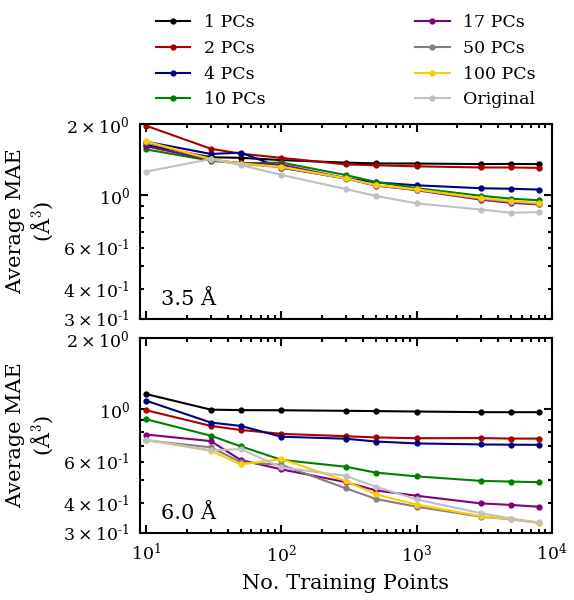

In [44]:
# Load DEEM 10k learning curves: PCA reconstructed volume

vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/KPCALearn/maeAvgTest.npy')
PCALearn6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/KPCALearn/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axs6.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], 
                marker='o', label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], 
                marker='o', label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
#axs3.set_prop_cycle(None)
#axs6.set_prop_cycle(None)
#for i in np.arange(0, PCALearn3.shape[0]):    
#    axs3.errorbar(PCALearn3[i, 0, 0, :, 3], PCALearn3[i, 0, 0, :, 4],
#                 yerr=PCALearn3[i, 0, 0, :, 5], fmt='none')
#    axs6.errorbar(PCALearn6[i, 0, 0, :, 3], PCALearn6[i, 0, 0, :, 4],
#                 yerr=PCALearn6[i, 0, 0, :, 5])

axs3.loglog(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5],
#             fmt='none', ecolor=colorList[-1])
axs6.loglog(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], marker='o', label='Original', c = colorList[-1])
#axs6.errorbar(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5],
#             fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
  
axs6.text(0.05, 0.05, u'6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 10000])
axs6.set_xlim([9, 10000])
axs3.set_ylim([0.3, 2])
axs6.set_ylim([0.3, 2])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_10k/learnPCA-volume.pdf', bbox_inches='tight')
plt.show()

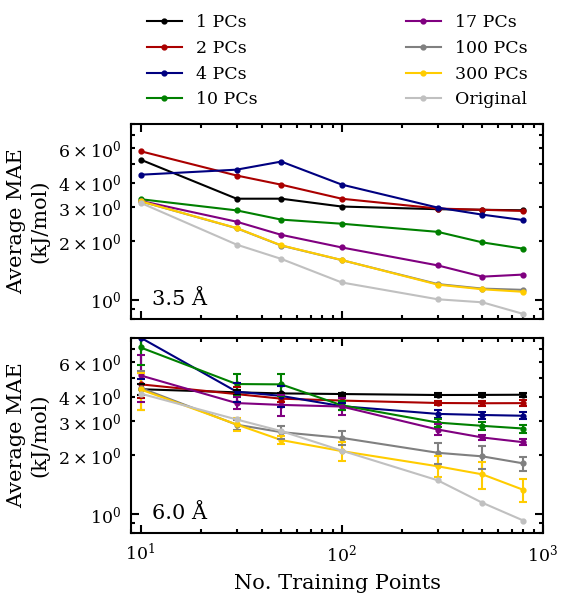

In [10]:
# Load DEEM 1k learning curves: PCA reconstructed energy

e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/maeAvgTest.npy')

PCALearn3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/KPCALearn/maeAvgTest.npy')
#PCALearn6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/KPCALearn/maeAvgTest.npy')
PCALearn6 = np.load('../Scripts/test3/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('Average MAE\n(kJ/mol)')
axs6.set_ylabel('Average MAE\n(kJ/mol)')

for i in np.arange(PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])
    
#axs3.set_prop_cycle(None)
axs6.set_prop_cycle(None)
for i in np.arange(0, PCALearn3.shape[0]):    
#    axs3.errorbar(PCALearn3[i, 0, 0, :, 3], PCALearn3[i, 0, 0, :, 4],
#                 yerr=PCALearn3[i, 0, 0, :, 5], fmt='none')
    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5],
                 yerr=PCALearn6[i, 0, 0, 0, :, 6], fmt='none')

axs3.loglog(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], 
#              fmt='none', ecolor=colorList[-1])
axs6.loglog(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5], 
#              fmt='none', ecolor=colorList[-1])

axs3.text(0.05, 0.05, u'3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')

    
axs6.text(0.05, 0.05, u'6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 1000])
axs6.set_xlim([9, 1000])
axs3.set_ylim([0.8, 8])
axs6.set_ylim([0.8, 8])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

#figLearn.savefig('../Results/DEEM_1k/learnPCA-energy.pdf', bbox_inches='tight')
plt.show()

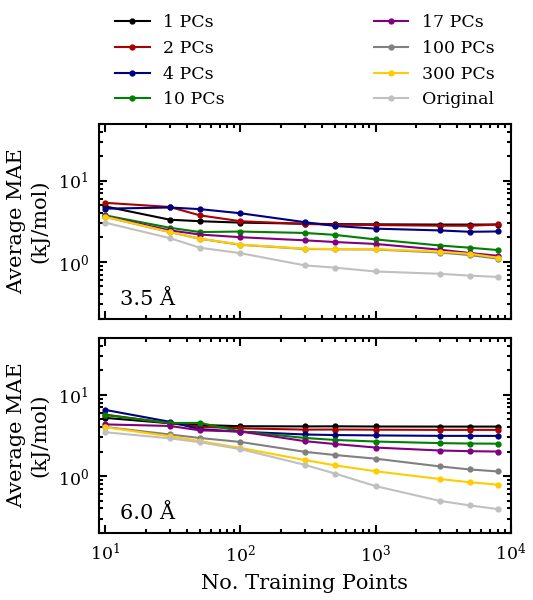

In [5]:
# Load DEEM 10k learning curves: PCA reconstructed energy

e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/maeAvgTest.npy')
PCALearn3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/KPCALearn/maeAvgTest.npy')
#PCALearn6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/PCALearn/maeAvgTest.npy')
PCALearn6 = np.load('../Scripts/test3/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axs3 = figLearn.add_subplot(2, 1, 1)
axs6 = figLearn.add_subplot(2, 1, 2)

axs6.set_xlabel('No. Training Points')    
axs3.set_ylabel('Average MAE\n(kJ/mol)')
axs6.set_ylabel('Average MAE\n(kJ/mol)')

for i in np.arange(0, PCALearn3.shape[0]):
    axs3.loglog(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn3[i, 0, 0, 0, 0, 0]), c=colorList[i])
    axs6.loglog(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], marker='o', 
                label=str('%d PCs' % PCALearn6[i, 0, 0, 0, 0, 0]), c=colorList[i])

axs3.loglog(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs3.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], 
#              fmt='none', ecolor=colorList[-1])
axs6.loglog(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], marker='o', label='Original', c=colorList[-1])
#axs6.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5],
#             fmt='none', ecolor=colorList[-1])

#axs3.set_prop_cycle(None)
#axs6.set_prop_cycle(None)
#for i in np.arange(0, PCALearn3.shape[0]):
#    axs3.errorbar(PCALearn3[i, 0, 0, 0, :, 4], PCALearn3[i, 0, 0, 0, :, 5],
#                  yerr=PCALearn3[i, 0, 0, 0, :, 6], fmt='none')
#    axs6.errorbar(PCALearn6[i, 0, 0, 0, :, 4], PCALearn6[i, 0, 0, 0, :, 5], 
#                  yerr=PCALearn6[i, 0, 0, 0, :, 6], fmt='none')

axs3.text(0.05, 0.05, u'3.5 \u00c5', horizontalalignment='left', verticalalignment='bottom', 
               transform=axs3.transAxes, fontsize='medium')
  
axs6.text(0.05, 0.05, u'6.0 \u00c5', horizontalalignment='left', verticalalignment='bottom',
               transform=axs6.transAxes, fontsize='medium')

axs3.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axs3.set_xlim([9, 10000])
axs6.set_xlim([9, 10000])
axs3.set_ylim([0.2, 50])
axs6.set_ylim([0.2, 50])

axs3.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_10k/learnPCA-energy.pdf', bbox_inches='tight')
plt.show()

It appears that with the intermediate PCAs, there is more variability because there is enough information to prevent the model from making bad predictions across the board (like the nPCA = 1 or nPCA = 2), but not enough to fully represent the correspondence between structure property and SOAP-based representation. In other words, the intermediate PCA values perform well for many structures, but makes INCREDIBLY bad predictions for others, driving up the error and standard deviation. This occurs at larger training set sizes as the model is exposed to more diversity
Does this mean the regularization parameters need to be adjusted for each PCA?

Update: Increasing the jitter parameter seems to reduce the variability

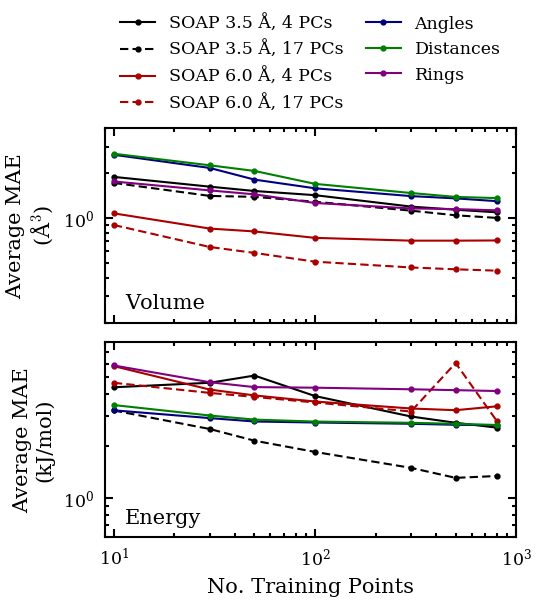

In [47]:
# Load DEEM 1k learning curves

#TODO: Update with jitter parameter

vol3 = np.load('../Processed_Data/DEEM_1k/Volume/3.5/KPCALearn/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_1k/Volume/6.0/KPCALearn/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_1k/Energy/3.5/KPCALearn/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_1k/Energy/6.0/KPCALearn/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_1k/Volume/Distances/maeAvgTest.npy')
volA = np.load('../Processed_Data/DEEM_1k/Volume/Angles/maeAvgTest.npy')
volR = np.load('../Processed_Data/DEEM_1k/Volume/Rings/Short/Distribution/maeAvgTest.npy')
eD = np.load('../Processed_Data/DEEM_1k/Energy/Distances/maeAvgTest.npy')
eA = np.load('../Processed_Data/DEEM_1k/Energy/Angles/maeAvgTest.npy')
eR = np.load('../Processed_Data/DEEM_1k/Energy/Rings/Short/Distribution/maeAvgTest.npy')

figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsVolume.loglog(vol3[4, 0, 0, 0, :, 4], vol3[4, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 17 PCs')
axsVolume.loglog(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsVolume.loglog(vol6[4, 0, 0, 0, :, 4], vol6[4, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 17 PCs')
axsVolume.loglog(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], marker='o', c=cc[2],
                 label='Angles')
axsVolume.loglog(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], marker='o', c=cc[3],
                 label='Distances')
axsVolume.loglog(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], marker='o', c=cc[4],
                 label='Rings')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsEnergy.loglog(e3[4, 0, 0, 0, :, 4], e3[4, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 17 PCs')
axsEnergy.loglog(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsEnergy.loglog(e6[4, 0, 0, 0, :, 4], e6[4, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 17 PCs')
axsEnergy.loglog(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], marker='o', c=cc[2],
                 label='Angles')
axsEnergy.loglog(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], marker='o', c=cc[3],
                 label='Distances')
axsEnergy.loglog(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], marker='o', c=cc[4],
                 label='Rings')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], yerr=volA[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], yerr=volD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], yerr=volR[0, 0, 0, :, 5], fmt='none')

#axsEnergy.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], yerr=eA[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], yerr=eD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], yerr=eR[0, 0, 0, :, 5], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 1000])
axsEnergy.set_xlim([9, 1000])
axsVolume.set_ylim([0.2, 4])
axsEnergy.set_ylim([0.6, 8])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)


figLearn.savefig('../Results/DEEM_1k/learnKPCADim.pdf', bbox_inches='tight')
plt.show()

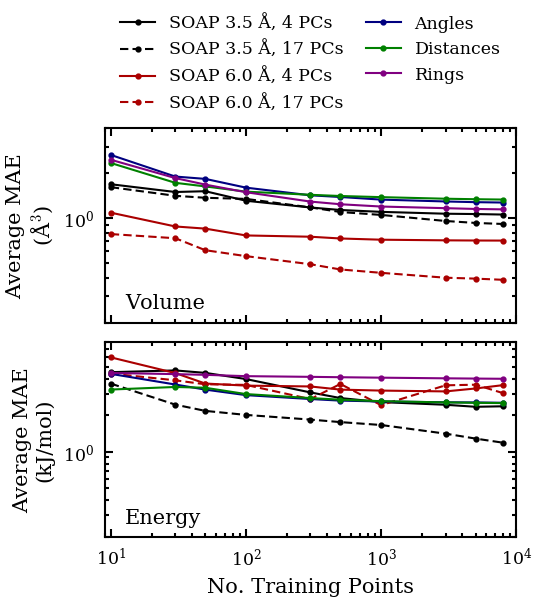

In [48]:
# Load DEEM 10k learning curves

#TODO: Update with jitter parameter
vol3 = np.load('../Processed_Data/DEEM_10k/Volume/3.5/KPCALearn/maeAvgTest.npy')
vol6 = np.load('../Processed_Data/DEEM_10k/Volume/6.0/KPCALearn/maeAvgTest.npy')
e3 = np.load('../Processed_Data/DEEM_10k/Energy/3.5/KPCALearn/maeAvgTest.npy')
e6 = np.load('../Processed_Data/DEEM_10k/Energy/6.0/KPCALearn/maeAvgTest.npy')
volD = np.load('../Processed_Data/DEEM_10k/Volume/Distances/maeAvgTest.npy') 
volA = np.load('../Processed_Data/DEEM_10k/Volume/Angles/maeAvgTest.npy') 
volR = np.load('../Processed_Data/DEEM_10k/Volume/Rings/Short/Distribution/maeAvgTest.npy') 
eD = np.load('../Processed_Data/DEEM_10k/Energy/Distances/maeAvgTest.npy') 
eA = np.load('../Processed_Data/DEEM_10k/Energy/Angles/maeAvgTest.npy') 
eR = np.load('../Processed_Data/DEEM_10k/Energy/Rings/Short/Distribution/maeAvgTest.npy') 


figLearn = plt.figure(figsize=(3.54, 3.54))
axsVolume = figLearn.add_subplot(2, 1, 1)
axsEnergy = figLearn.add_subplot(2, 1, 2)

axsEnergy.set_xlabel('No. Training Points')    
axsVolume.set_ylabel('Average MAE\n' + ur'(\u00c5$^3$)')
axsEnergy.set_ylabel('Average MAE\n(kJ/mol)')

axsVolume.loglog(vol3[2, 0, 0, 0, :, 4], vol3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsVolume.loglog(vol3[4, 0, 0, 0, :, 4], vol3[4, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 17 PCs')
axsVolume.loglog(vol6[2, 0, 0, 0, :, 4], vol6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsVolume.loglog(vol6[4, 0, 0, 0, :, 4], vol6[4, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 17 PCs')
axsVolume.loglog(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], marker='o', c=cc[2],
                 label='Angles')
axsVolume.loglog(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], marker='o', c=cc[3],
                 label='Distances')
axsVolume.loglog(volR[0, 0, 0, 0, :, 4], volR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsVolume.text(0.05, 0.05, 'Volume', horizontalalignment='left', verticalalignment='bottom', 
               transform=axsVolume.transAxes, fontsize='medium')

axsEnergy.loglog(e3[2, 0, 0, 0, :, 4], e3[2, 0, 0, 0, :, 5], marker='o', c=cc[0],
                 label=u'SOAP 3.5 \u00c5, 4 PCs')
axsEnergy.loglog(e3[4, 0, 0, 0, :, 4], e3[4, 0, 0, 0, :, 5], marker='o', c=cc[0], linestyle='--',
                 label=u'SOAP 3.5 \u00c5, 17 PCs')
axsEnergy.loglog(e6[2, 0, 0, 0, :, 4], e6[2, 0, 0, 0, :, 5], marker='o', c=cc[1],
                 label=u'SOAP 6.0 \u00c5, 4 PCs')
axsEnergy.loglog(e6[4, 0, 0, 0, :, 4], e6[4, 0, 0, 0, :, 5], marker='o', c=cc[1], linestyle='--',
                 label=u'SOAP 6.0 \u00c5, 17 PCs')
axsEnergy.loglog(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], marker='o', c=cc[2],
                 label='Angles')
axsEnergy.loglog(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], marker='o', c=cc[3],
                 label='Distances')
axsEnergy.loglog(eR[0, 0, 0, 0, :, 4], eR[0, 0, 0, 0, :, 5], marker='o', c=cc[4],
                 label='Rings')
axsEnergy.text(0.05, 0.05, 'Energy', horizontalalignment='left', verticalalignment='bottom',
               transform=axsEnergy.transAxes, fontsize='medium')

#axsVolume.set_prop_cycle(None)
#axsEnergy.set_prop_cycle(None)

#axsVolume.errorbar(vol3[0, 0, 0, :, 3], vol3[0, 0, 0, :, 4], yerr=vol3[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(vol6[0, 0, 0, :, 3], vol6[0, 0, 0, :, 4], yerr=vol6[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volA[0, 0, 0, :, 3], volA[0, 0, 0, :, 4], yerr=volA[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volD[0, 0, 0, :, 3], volD[0, 0, 0, :, 4], yerr=volD[0, 0, 0, :, 5], fmt='none')
#axsVolume.errorbar(volR[0, 0, 0, :, 3], volR[0, 0, 0, :, 4], yerr=volR[0, 0, 0, :, 5], fmt='none')

#axsEnergy.errorbar(e3[0, 0, 0, :, 3], e3[0, 0, 0, :, 4], yerr=e3[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(e6[0, 0, 0, :, 3], e6[0, 0, 0, :, 4], yerr=e6[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eA[0, 0, 0, :, 3], eA[0, 0, 0, :, 4], yerr=eA[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eD[0, 0, 0, :, 3], eD[0, 0, 0, :, 4], yerr=eD[0, 0, 0, :, 5], fmt='none')
#axsEnergy.errorbar(eR[0, 0, 0, :, 3], eR[0, 0, 0, :, 4], yerr=eR[0, 0, 0, :, 5], fmt='none')

axsVolume.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.0, 1.0, 1.0, 0.0), ncol=2, mode='expand')

axsVolume.set_xlim([9, 10000])
axsEnergy.set_xlim([9, 10000])
axsVolume.set_ylim([0.2, 4])
axsEnergy.set_ylim([0.2, 8])

axsVolume.set_xticklabels([])
figLearn.subplots_adjust(wspace=0.0, hspace=0.1)

figLearn.savefig('../Results/DEEM_10k/learnKPCADim.pdf', bbox_inches='tight')
plt.show()